<a href="https://colab.research.google.com/github/iterative/dvclive/blob/main/examples/DVCLive-Quickstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DVCLive Quickstart

+ [DVCLive](https://studio.iterative.ai/user/Etixi/create-project)

## Install dvclive

In [ ]:
!pip install dvclive

## Initialize DVC Repository

In [ ]:
!git init -q
!git config --local user.email "etiennekoa6@gmail.com"
!git config --local user.name "etixi"
!dvc init -q
!git commit -m "DVC init"

[master (root-commit) 5579352] DVC init
 3 files changed, 6 insertions(+)
 create mode 100644 .dvc/.gitignore
 create mode 100644 .dvc/config
 create mode 100644 .dvcignore


## Setup code

In [ ]:
#@title Training helpers. { display-mode: "form" }

import numpy as np
import torch
import torch.nn.functional as F
import torchvision

from dvclive import Live

device = "cuda:0" if torch.cuda.is_available() else "cpu"


def transform(dataset):
    """Get inputs and targets from dataset."""
    x = dataset.data.reshape(len(dataset.data), 1, 28, 28)/255
    y = dataset.targets
    return x.to(device), y.to(device)


def train_one_epoch(model, criterion, x, y, lr, weight_decay):
    model.train()
    optimizer = torch.optim.Adam(
        model.parameters(), lr=lr, weight_decay=weight_decay)
    y_pred = model(x)
    loss = criterion(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


def predict(model, x):
    """Get model prediction scores."""
    model.eval()
    with torch.no_grad():
        y_pred = model(x)
    return y_pred


def get_metrics(y, y_pred, y_pred_label):
    """Get loss and accuracy metrics."""
    metrics = {}
    criterion = torch.nn.CrossEntropyLoss()
    metrics["loss"] = criterion(y_pred, y).item()
    metrics["acc"] = (y_pred_label == y).sum().item()/len(y)
    return metrics


def evaluate(model, x, y):
    """Evaluate model and save metrics."""
    scores = predict(model, x)
    _, labels = torch.max(scores, 1)
    actual = [int(v) for v in y]
    predicted = [int(v) for v in labels]

    metrics = get_metrics(y, scores, labels)

    return metrics, actual, predicted

def get_missclassified_image(actual, predicted, dataset):
    confusion = {}
    for n, (a, p) in enumerate(zip(actual, predicted)):
        image = np.array(dataset[n][0]) / 255
        confusion[(a, p)] = image

    max_i, max_j = 0, 0
    for (i, j) in confusion:
        if i > max_i:
            max_i = i
        if j > max_j:
            max_j = j

    frame_size = 30
    image_shape = (28, 28)
    incorrect_color = np.array((255, 100, 100), dtype="uint8")
    label_color = np.array((100, 100, 240), dtype="uint8")

    out_matrix = np.ones(shape=((max_i+2) * frame_size, (max_j+2) * frame_size, 3), dtype="uint8") * 240

    for i in range(max_i+1):
        if (i, i) in confusion:
            image = confusion[(i, i)]
            xs = (i + 1) * frame_size + 1
            xe = (i + 2) * frame_size - 1
            ys = 1
            ye = frame_size - 1
            for c in range(3):
                out_matrix[xs:xe, ys:ye, c] = (1 - image) * label_color[c]
                out_matrix[ys:ye, xs:xe, c] = (1 - image) * label_color[c]

    for (i, j) in confusion:
        image = confusion[(i, j)]
        assert image.shape == image_shape
        xs = (i + 1) * frame_size + 1
        xe = (i + 2) * frame_size - 1
        ys = (j + 1) * frame_size + 1
        ye = (j + 2) * frame_size - 1
        assert (xe-xs, ye-ys) == image_shape
        if i != j:
            for c in range(3):
                out_matrix[xs:xe, ys:ye, c] = (1 - image) * incorrect_color[c]

    return out_matrix

In [ ]:
#@title Initialize model and dataset. { display-mode: "form" }

model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(28 * 28, 128),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.1),
    torch.nn.Linear(128, 64),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.1),
    torch.nn.Linear(64, 10),
).to(device)

criterion = torch.nn.CrossEntropyLoss()

mnist_train = torchvision.datasets.MNIST("data", download=True)
x_train, y_train = transform(mnist_train)
mnist_test = torchvision.datasets.MNIST("data", download=True, train=False)
x_test, y_test = transform(mnist_test)

## Tracking experiments with DVCLive

# DVC Report

params.yaml

|   epochs |    lr |   weight_decay |
|----------|-------|----------------|
|        5 | 0.003 |              0 |

metrics.json

|   train.loss |   train.acc |   test.loss |   test.acc |   step |
|--------------|-------------|-------------|------------|--------|
|      1.63535 |    0.624233 |     1.62497 |      0.618 |      4 |

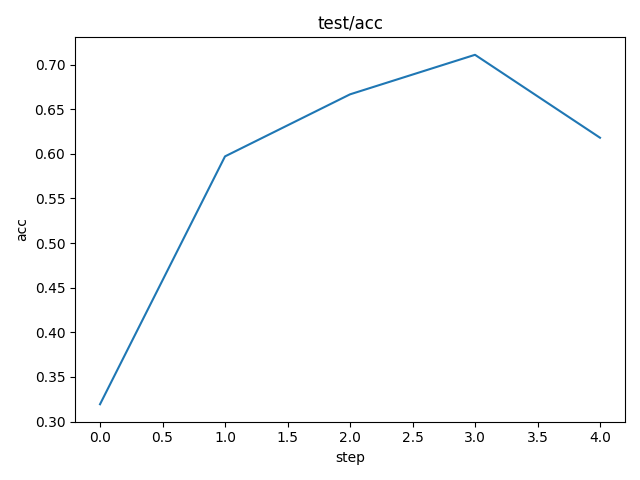

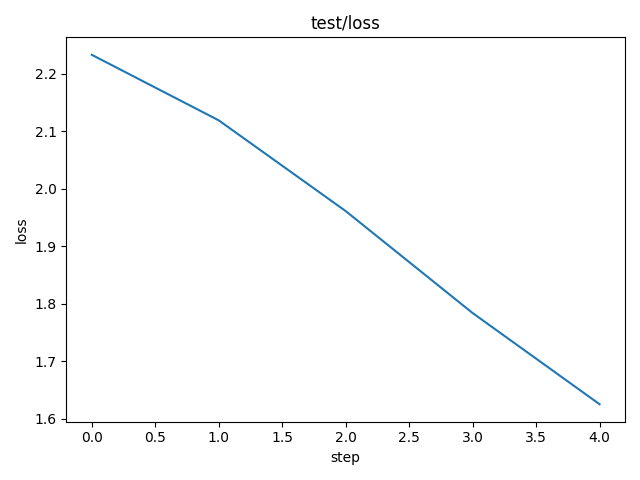

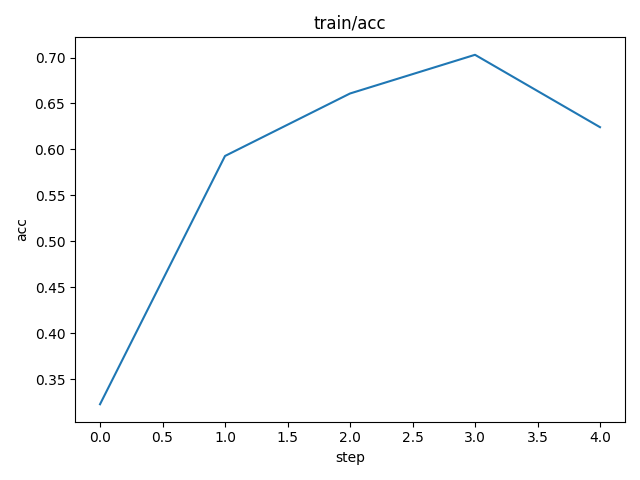

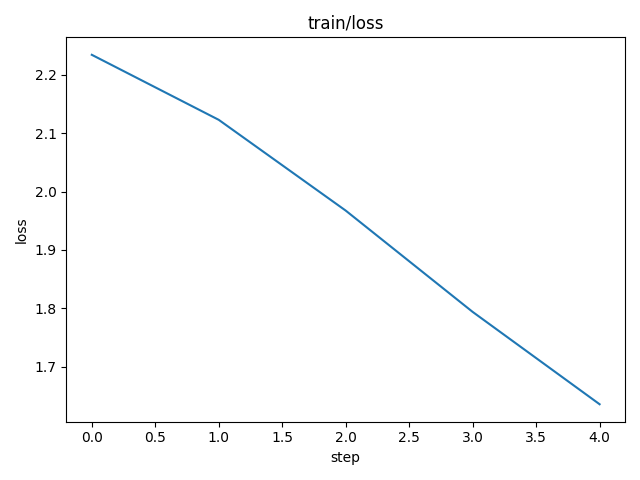

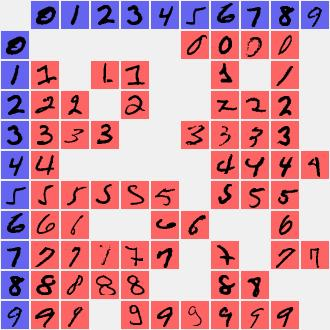




/usr/local/lib/python3.10/dist-packages/dvc_render/vega.py:169: UserWarning: `generate_markdown` can only be used with `LinearTemplate`
  warn("`generate_markdown` can only be used with `LinearTemplate`")  # noqa: B028


	.config/.last_survey_prompt.yaml, .config/active_config, .config/gce, .config/config_sentinel, .config/default_configs.db, .config/.last_opt_in_prompt.yaml, .config/.last_update_check.json, .config/logs/2024.02.09/14.20.28.133425.log, .config/logs/2024.02.09/14.20.19.242403.log, .config/logs/2024.02.09/14.19.38.353595.log, .config/logs/2024.02.09/14.20.11.873556.log, .config/logs/2024.02.09/14.20.03.220731.log, .config/logs/2024.02.09/14.20.28.894064.log, .config/configurations/config_default, data/MNIST/raw/t10k-labels-idx1-ubyte.gz, data/MNIST/raw/t10k-images-idx3-ubyte.gz, data/MNIST/raw/train-images-idx3-ubyte, data/MNIST/raw/train-labels-idx1-ubyte.gz, data/MNIST/raw/t10k-images-idx3-ubyte, data/MNIST/raw/t10k-labels-idx1-ubyte, data/MNIST/raw/train-labels-idx1-ubyte, data/MNIST/raw/train-images-idx3-ubyte.gz, sample_data/README.md, sample_data/anscombe.json, sample_data/california_housing_test.csv, sample_data/mnist_test.csv, sample_data/california_housing_train.csv, sample_data

In [ ]:
# You can modify these parameters to see how they affect the training
# And run the cell several times
params = {
    "epochs": 5,
    "lr": 0.003,
    "weight_decay": 0
}

best_test_acc = 0

with Live(report="notebook") as live:

    live.log_params(params)

    for _ in range(params["epochs"]):

        train_one_epoch(
            model, criterion, x_train, y_train, params["lr"], params["weight_decay"]
        )

        # Train Evaluation
        metrics_train, acual_train, predicted_train = evaluate(
            model, x_train, y_train)

        for k, v in metrics_train.items():
            live.log_metric(f"train/{k}", v)

        live.log_sklearn_plot(
            "confusion_matrix",
            acual_train, predicted_train,
            name="train/confusion_matrix"
        )

        # Test Evaluation
        metrics_test, actual, predicted = evaluate(
            model, x_test, y_test)

        for k, v in metrics_test.items():
            live.log_metric(f"test/{k}", v)

        live.log_sklearn_plot(
            "confusion_matrix", actual, predicted, name="test/confusion_matrix"
        )

        live.log_image(
            "misclassified.jpg",
            get_missclassified_image(actual, predicted, mnist_test)
        )

        # Save best model
        if metrics_test["acc"] > best_test_acc:
            torch.save(model.state_dict(), "model.pt")

        live.next_step()

    live.log_artifact("model.pt")

## Comparing results

In [ ]:
import dvc.api
import pandas as pd

columns = ["epochs", "lr", "weight_decay", "test.acc"]

df = pd.DataFrame(dvc.api.exp_show(), columns=columns)

df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df


epochs     lr  weight_decay  test.acc
0     5.0  0.003           0.0     0.618
1     5.0  0.003           0.0     0.618

In [ ]:
from plotly.express import parallel_coordinates

fig = parallel_coordinates(df, columns, color="test.acc")
fig.show()

In [ ]:
!dvc plots diff $(dvc exp list --names-only)

file:///content/dvc_plots/index.html


In [ ]:
from IPython.display import HTML
HTML(filename='./dvc_plots/index.html')